Data prep

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

print(f'tfver: {tf.__version__}')

from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3, suppress=True)

rawdf = pd.read_csv('../data/train.csv')

rawdf['Alley'] = rawdf['Alley'].fillna('None')
rawdf['MasVnrType'] = rawdf['MasVnrType'].fillna('None')
rawdf['BsmtQual'] = rawdf['BsmtQual'].fillna('None')
rawdf['BsmtCond'] = rawdf['BsmtCond'].fillna('None')
rawdf['BsmtExposure'] = rawdf['BsmtExposure'].fillna('None')
rawdf['BsmtFinType1'] = rawdf['BsmtFinType1'].fillna('None')
rawdf['BsmtFinType2'] = rawdf['BsmtFinType2'].fillna('None')
rawdf['Electrical'] = rawdf['Electrical'].fillna('None')
rawdf['FireplaceQu'] = rawdf['FireplaceQu'].fillna('None')
rawdf['GarageType'] = rawdf['GarageType'].fillna('None')
rawdf['GarageFinish'] = rawdf['GarageFinish'].fillna('None')
rawdf['GarageQual'] = rawdf['GarageQual'].fillna('None')
rawdf['GarageCond'] = rawdf['GarageCond'].fillna('None')
rawdf['PoolQC'] = rawdf['PoolQC'].fillna('None')
rawdf['Fence'] = rawdf['Fence'].fillna('None')
rawdf['MiscFeature'] = rawdf['MiscFeature'].fillna('None')

# drop columns with too many missing values
rawdf.drop('LotFrontage', axis=1, inplace=True)
rawdf.drop('GarageYrBlt', axis=1, inplace=True)

# drop rows with missing values
rawdf = rawdf.dropna()
rawdf = rawdf[rawdf['LotArea'] < 90000]

y_df = rawdf['SalePrice']

numcols = rawdf.dtypes[rawdf.dtypes != 'object'].keys()
textcols = rawdf.dtypes[rawdf.dtypes == 'object'].keys()

numdf = pd.DataFrame(rawdf[numcols])
numdf.drop('SalePrice', axis=1, inplace=True)
numdf['LotArea'] = np.log(numdf['LotArea'])

# normalized_df=(numdf-numdf.mean())/numdf.std()
normalized_df=numdf # unnormalized
normalized_categories = pd.get_dummies(rawdf[textcols], dtype=float)

X_df = pd.concat([normalized_df, normalized_categories], axis=1)
# X_df = pd.DataFrame(normalized_df)

# X = np.array(X_df)
# y = np.array(y_df)
X = X_df
y = y_df

# randomly split the data into training, cross validation and test sets
random_state = 42

X_train, X_blind, y_train, y_blind = train_test_split(
    X, y, test_size=0.4, random_state=random_state)

X_test, X_cv, y_test, y_cv = train_test_split(
    X_blind, y_blind, test_size=0.5, random_state=random_state)

X_train_id = X_train.pop('Id')
X_cv_id = X_cv.pop('Id')
X_test_id = X_test.pop('Id')
X_id = X.pop('Id')

tfver: 2.16.1


In [2]:
import matplotlib.pyplot as plt
from features import plot_feature_vs_target
import matplotlib.colors as mcolors

# cmap = mcolors.LinearSegmentedColormap.from_list('hmm', ["red", "blue"])
# # fig, axes = plot_feature_vs_target(plt, X, y, color_feature=X['OverallQual'], title='My Chart', )
# fig, axes = plot_feature_vs_target(plt, X.iloc[:, 1:36], y, color_feature=X['OverallQual'], cmap=cmap )
# # fig, axes = plot_feature_vs_target(plt, X, y, color_feature=X['OverallQual'] )
# # fig, axes = plot_feature_vs_target(plt, X, y , color_feature=y)
# plt.show()

xtd = X_train.describe().transpose()

NN model

In [3]:
import matplotlib.pyplot as plt


def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      # layers.Dense(200, activation='relu'),
      # layers.Dense(200, activation='relu'),
      # layers.Dense(200, activation='relu'),
      # layers.Dense(200, activation='relu'),
      # layers.Dense(200, activation='relu'),
      layers.Dense(200, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.01))
  return model

In [4]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

dnn_model = build_and_compile_model(normalizer)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 178780.6094 - val_loss: 182391.4688
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 181450.6406 - val_loss: 181923.1406
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177693.3125 - val_loss: 180769.5469
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 177374.2656 - val_loss: 178774.1406
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172042.4062 - val_loss: 175926.5469
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 171041.0938 - val_loss: 172162.5000
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172188.2656 - val_loss: 167517.0938
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 166647.1875 - val_loss: 162220.6562
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 156793.9531 - val_loss: 156223.9844
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157892.8281 - val_loss: 149650.5000
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

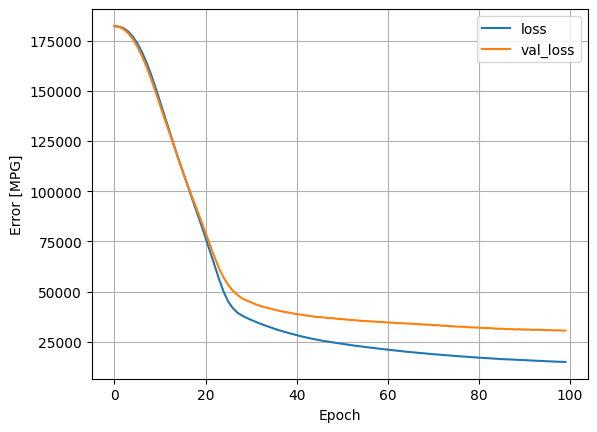

In [5]:
epochs = 100
history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    verbose=1, epochs=epochs)

plot_loss(history)

# history = model.fit(X_train, y_train, epochs=epochs, verbose=2)
# test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)


In [6]:
test_predictions = dnn_model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [7]:
tpdf = pd.DataFrame(test_predictions)
tpdf.columns = ['predicted']
tpdf['actual'] = y_test.values
tpdf['diff'] = tpdf['actual'] - tpdf['predicted'] 
tpdf['Id'] = X_test_id.values

dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 301)            │           603 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,408 (712.54 KB)

 Trainable params: 60,601 (236.72 KB)

 Non-trainable params: 603 (2.36 KB)

 Optimizer params: 121,204 (473.46 KB)

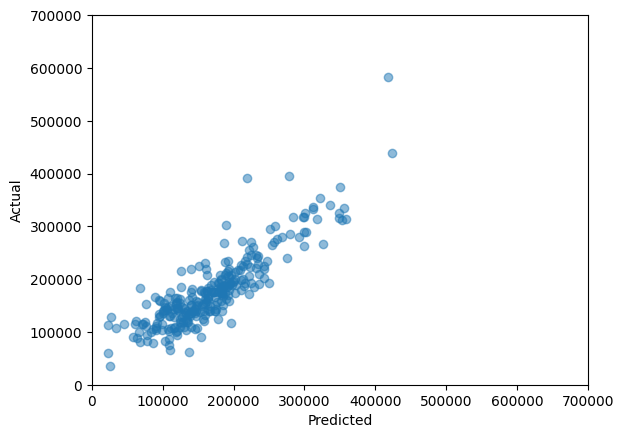

In [8]:
lims = [0, 700000]
plt.xlim(lims)
plt.ylim(lims)
plt.scatter(tpdf['predicted'], tpdf['actual'], alpha=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
result = dnn_model.evaluate(X_cv, y_cv)
print(result)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19096684.0000 
12513376.0


In [10]:
result

12513376.0

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

KeyError: 'accuracy'